In [1]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# define model
## note: p_EI could be included but it's just 1.
def SEIHRD_model(y, t, beta, r_EI, r_IR, r_IH_u, r_IH_v, r_HR, r_HD, NPI_mult, vacc_mult, N):
    S_u, S_v, E_u, E_v, I_u, I_v, H, R, D = y
    dS_udt = -I_u*NPI_mult(t)*S_u*beta(t)/N(t) - I_v*NPI_mult(t)*S_u*beta(t)/N(t) # done
    dS_vdt = -I_u*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) - I_v*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) # done
    dE_udt = I_u*NPI_mult(t)*S_u*beta(t)/N(t) + I_v*NPI_mult(t)*S_u*beta(t)/N(t) - E_u*r_EI(t) # done
    dE_vdt = I_u*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) + I_v*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) - E_v*r_EI(t) # done
    dI_udt = E_u*r_EI(t) - I_u*r_IR(t) - I_u*r_IH_u(t)
    dI_vdt = E_v*r_EI(t) - I_v*r_IR(t) - I_v*r_IH_v(t)
    dHdt = I_u*r_IH_u(t) + I_v*r_IH_v(t) - H*r_HR(t) - H*r_HD(t)
    dRdt = I_u*r_IR(t) + I_v*r_IR(t) + H*r_HR(t)
    dDdt = H*r_HD(t) # done
    # dS_vdt = -I_u*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) - I_v*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) # done
    # dE_udt = I_u*NPI_mult(t)*S_u*beta(t)/N(t) + I_v*NPI_mult(t)*S_u*beta(t)/N(t) - E_u*r_EI(t) # done
    # dE_vdt = I_u*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) + I_v*NPI_mult(t)*S_v*beta(t)*vacc_mult(t)/N(t) - E_v*r_EI(t) # done
    # dI_udt = E_u*r_EI(t) - I_u*r_IR(t) - I_u*r_IH_u(t)
    # dI_vdt = E_v*r_EI(t) - I_v*r_IR(t) - I_v*r_IH_v(t)
    # dHdt = I_u*r_IH_u(t) + I_v*r_IH_v(t) - H*r_HR(t) - H*r_HD(t)
    # dRdt = I_u*r_IR(t) + I_v*r_IR(t) + H*r_HR(t)
    # dDdt = H*r_HD(t) # done
    return dS_udt, dS_vdt, dE_udt, dE_vdt, dI_udt, dI_vdt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD(t, S_u, S_v, E_u, E_v, I_u, I_v, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S_u, 'r', alpha=0.7, linewidth=2, label='Susceptible unvacc')
    ax.plot(t, E_u, 'o', alpha=0.7, linewidth=2, label='Exposed unvacc')
    ax.plot(t, I_u, 'y', alpha=0.7, linewidth=2, label='Infected unvacc')
    ax.plot(t, S_v, 'r', alpha=0.7, linewidth=2, linestyle='dotted', label='Susceptible unvacc')
    ax.plot(t, E_v, 'o', alpha=0.7, linewidth=2, linestyle='dotted', label='Exposed unvacc')
    ax.plot(t, I_v, 'y', alpha=0.7, linewidth=2, linestyle='dotted', label='Infected unvacc')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    # ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

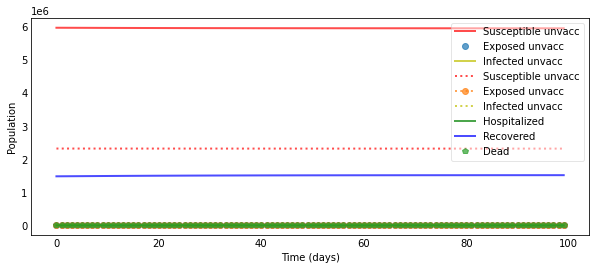

In [26]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.125])
def r_EI(t): return np.piecewise(t, [t>=0], [0.1424])
def r_IR(t): return np.piecewise(t, [t>=0], [0.15]) ## stratified in AMR??
def r_IH_u(t): return np.piecewise(t, [t>=0], [0.0041])
def r_IH_v(t): return np.piecewise(t, [t>=0], [0.0013])
def r_HR(t): return np.piecewise(t, [t>=0], [0.155])
def r_HD(t): return np.piecewise(t, [t>=0], [0.0099])
def NPI_mult(t): return np.piecewise(t, [t>=0], [1.0])
def vacc_mult(t): return np.piecewise(t, [t>=0], [0.3])
def N(t): return np.piecewise(t, [t>=0], [9830000.0]) 

# set initial conditions
N0 = 9830000.0
Sv0 = 5977629.36
Su0 = 2324633.64
Ev0 = 3458.66666666667
Eu0 = 6917.33333333333
Iv0 = 1729.33333333333
Iu0 = 3458.66666666667
H0 = 673
R0 = 1484896
D0 = 26604
y0 = Sv0, Su0, Ev0, Eu0, Iv0, Iu0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 100
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, r_IR, r_IH_u, r_IH_v, r_HR, r_HD, NPI_mult, vacc_mult, N))
Sv, Su, Ev, Eu, Iv, Iu, H, R, D = sim.T

# plot results
# plotSEIHRD(tvect, S, E, I, H, R, D) ## original
plotSEIHRD(tvect, Sv, Su, Ev, Eu, Iv, Iu, H, R, D) 

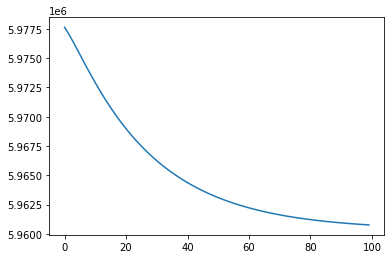

In [36]:
plt.plot(tvect, Sv)

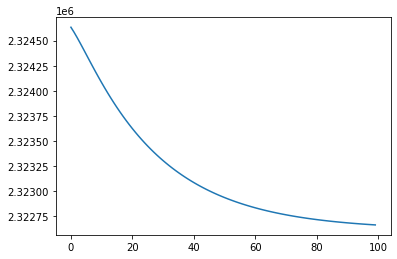

In [37]:
plt.plot(tvect, Su)

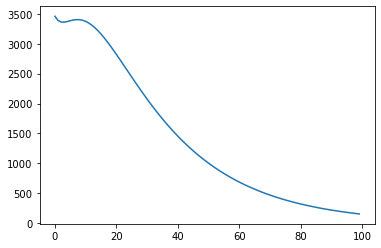

In [38]:
plt.plot(tvect, Ev)

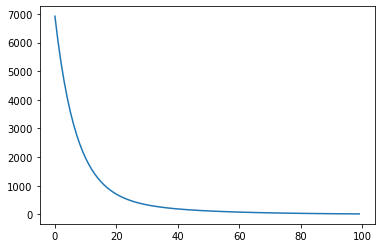

In [39]:
plt.plot(tvect, Eu)

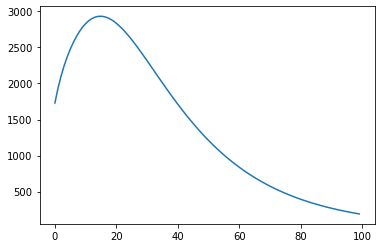

In [40]:
plt.plot(tvect, Iv)

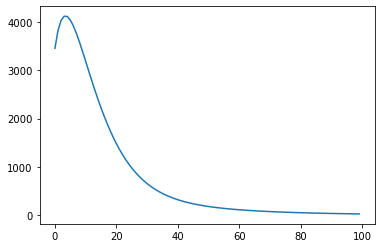

In [41]:
plt.plot(tvect, Iu)

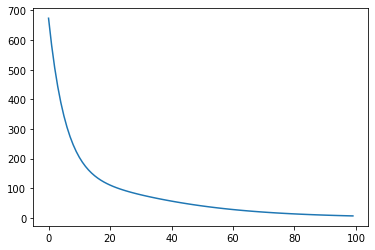

In [42]:
plt.plot(tvect, H)

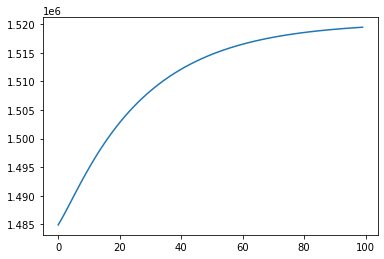

In [43]:
plt.plot(tvect, R)

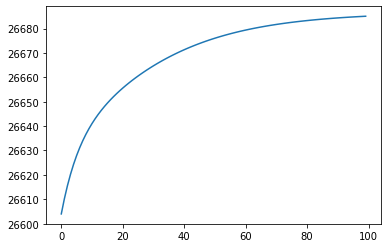

In [44]:
plt.plot(tvect, D)